In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
newyork = pd.read_csv("../../../Data & Script/newyork_offence.csv", skiprows=4, thousands=",")
print(len(newyork))
newyork.columns

351


Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [2]:
# see null values in all columns
#print(newyork.isna().sum())
# dropping column 4 and 12 because they contain a lot of null values
newyork = newyork.drop(newyork.columns[4], axis=1)
newyork = newyork.drop(newyork.columns[-1], axis=1)
# drop a cell which contains atleast one missing values, 
newyork = newyork.dropna().reset_index(drop=True)

In [3]:
# finding highest value from the non outleirs
# outliers = np.where(stats.zscore(newyork['Population']) >= 3)
# non_outliers = np.where(stats.zscore(newyork['Population']) < 3)
# sorted_numbers = np.sort(newyork.loc[non_outliers]['Population'])[::-1]
# sorted_numbers

In [4]:
# replace outlier with the mean
# iteration determines how many times you want to run the replacement
def replace_outliers_with_mean(datax, column, iteration):
    replaced_numbers = set()
    for i in range(iteration):
        outliers = np.where(np.abs(stats.zscore(datax[column])) >= 3)
        non_outliers = np.where(np.abs(stats.zscore(datax[column])) < 3)
        the_mean = np.mean(non_outliers)
        if(len(outliers[0]) > 0):
            replaced_numbers.update(outliers[0])
            # sort the numbers in the non_outlier list
            # for each outlier in outliers list
            for o in outliers:
            # replace with the highest number in the non_outlier list
                datax.loc[o,column] = the_mean
    return replaced_numbers

def replace_outliers_with_highest(datax, column, iteration):
    replaced_numbers = set()
    for i in range(iteration):
        outliers = np.where(np.abs(stats.zscore(datax[column])) >= 3)
        non_outliers = np.where(np.abs(stats.zscore(datax[column])) < 3)
        if(len(outliers[0]) > 0):
            replaced_numbers.update(outliers[0])
            # sort the numbers in the non_outlier list
            sorted_numbers = np.sort(datax.loc[non_outliers][column])[::-1]
            # for each outlier in outliers list
            for o in outliers:
            # replace with the highest number in the non_outlier list
                datax.loc[o,column] = sorted_numbers[0]
    return replaced_numbers

In [5]:
# see how replacing outliers changes the distribution

# fig = plt.figure(figsize=(6,6))

# fig.add_subplot(231)

# sns.boxplot(newyork['Population'], orient="v")

# outlier1, newyork = replace_outliers(newyork, 'Population')
# fig.add_subplot(232)
# sns.boxplot(newyork['Population'], orient="v")

# outlier2, newyork = replace_outliers(newyork, 'Population')
# fig.add_subplot(233)
# sns.boxplot(newyork['Population'], orient="v")


# print(outlier1)
# print(outlier2)


In [6]:
# myset = set()
# myset.update(np.array([1,2,3]))
# outliers = np.where(stats.zscore(newyork['Population']) >= 3)[0]

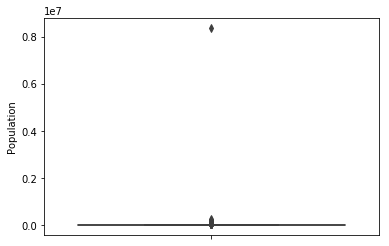

In [7]:
# before outlier removal
sns.boxplot(newyork['Population'], orient="v")

In [8]:
# replace outliers in all collumns with the mean of the column
for col in newyork.columns[1:]:
    # print which rows are replaced
    replaced_numbers = replace_outliers_with_mean(newyork, col,1)
    print(replaced_numbers)

{216}
{216}
{216}
{216}
{216}
{216}
{216}
{216, 35}
{216}
{216}


In [9]:
newyork.loc[[216,35]]['City']

216    New York
35      Buffalo
Name: City, dtype: object

New York city is an outlier in all the features and Buffalo has outlier value in one column

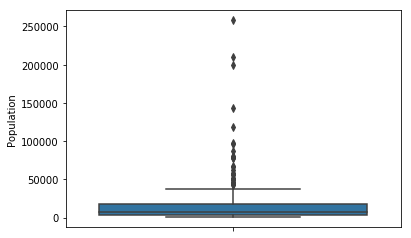

In [10]:
# after oulier removal
sns.boxplot(newyork['Population'], orient="v")

In [11]:
#create the features
newyork['PopSquared'] = newyork['Population'] ** 2
newyork['Murder'] = newyork[newyork.columns[3]] > 0
newyork['Robbery'] = newyork['Robbery'] > 0
# rename columns
new_column_names = ['city', 'population', 'violent_crime', 'murder_cont', 'rape2', 'robbery',
                   'aggravated_assault', 'property_crime', 'burglary', 
                   'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder']
newyork.columns = new_column_names
# rearrange the colums(move the dependant variable to the end)
# a regression model with multiple dependent variables is called multivariate not multivariable
# multivariable means multiple independent variables and one dependent variable
newyork.columns = new_column_names[:7] + new_column_names[8:] + [new_column_names[7]]

Beware of these
- Colinearity
- Correlation with the outcome
- Overfitting as a result of too many variables

Steps to make a regression model

1. Generate potential dependant and independant variables
2. Collect data on variables
3. Check the relationship between each independant and the dependant variable using scatter plots and correlation
4. Check the relationship among independant variables using scatter plots and correlation
5. Conduct linear regression for each IV/DV pair

#### How to interpret correlations

- [0.9, 1.0] very highly correlated
- [0.7, 0.9] highly correlated
- [0.5, 0.7] moderately correlated
- [0.3, 0.5] low correlation
- < 0.3 have little if any (linear) correlation.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


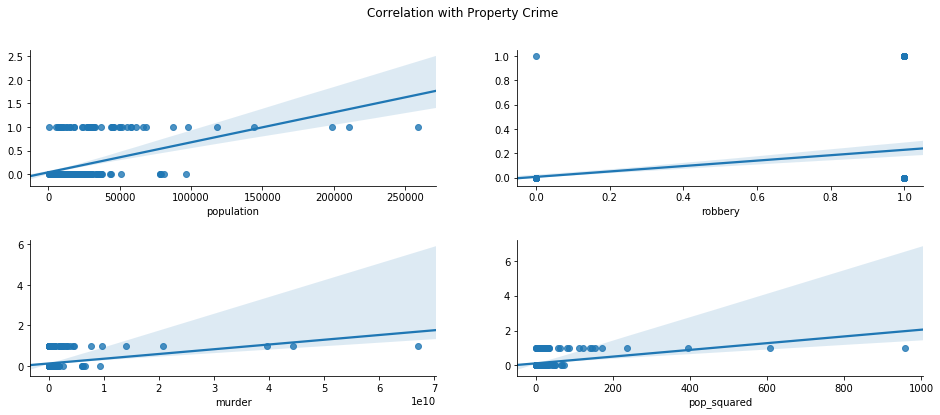

In [12]:
newyork_selected = newyork[['population', 'robbery','murder', 'pop_squared','property_crime']]
# scatter plot to show the relationship between depedent and independent variables
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Correlation with Property Crime")
for i,v in enumerate(['population', 'robbery','murder', 'pop_squared']): 
    ax = fig.add_subplot(220 + i +1)
    sns.regplot(newyork_selected[v], newyork_selected['property_crime'])
    sns.despine()
    ax.set(ylabel='')
# TGA The shading shows how the values vary for each predicted value

In [13]:
# see the correlation among these variables
newyork_selected.corr()

,population,robbery,murder,pop_squared,property_crime
population,1.000000,0.342479,0.888425,0.817205,0.493882
robbery,0.342479,1.000000,0.151677,0.168000,0.313271
murder,0.888425,0.151677,1.000000,0.929582,0.340424
pop_squared,0.817205,0.168000,0.929582,1.000000,0.378263
property_crime,0.493882,0.313271,0.340424,0.378263,1.000000


Removing outlier helped. Population, Robbery, Murder, PopSquared are all correlated with the output. Some mutlicolinearity exists

In [14]:
# create a regression model on these features
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = newyork[['population', 'robbery','murder', 'pop_squared']]
Y = newyork['property_crime']
reg.fit(X,Y)
print(reg.coef_)
print(reg.score(X,Y))

[ 1.10512162e-05  5.08498483e-02 -6.15051106e-11  2.53304288e-03]
0.3295667919866683


r2 is not impressive.

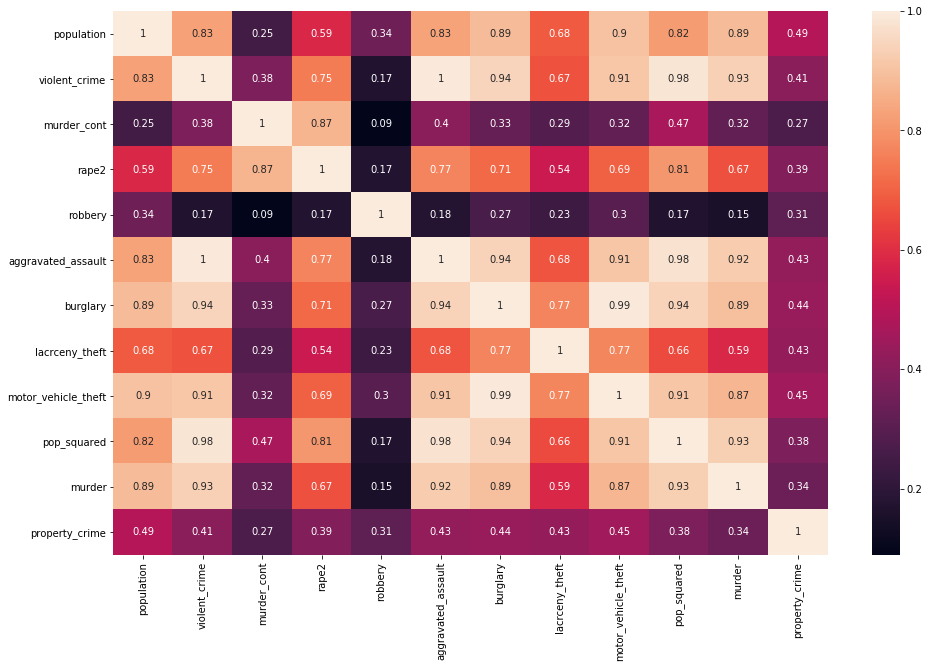

In [15]:
 fig = plt.figure(figsize=(16,10))
 sns.heatmap(newyork.corr(), annot=True)
 plt.show()

In [16]:
import itertools

# all independent variables
all_features = newyork.columns[1:-1]

print("How many independant variables? ", len(all_features))
# stores the score of each subset of features
scores = dict()
# find all possible combinations of features
for L in range(0, len(all_features)+1):
    for subset in itertools.combinations(all_features, L):
        if(len(subset) > 0):
            X =  newyork[list(subset)]
            Y =  newyork['property_crime']
            # fit a regression model
            reg.fit(X,Y)
            # calculate score and store to the dictionary
            scores[str(subset)] = reg.score(X, Y)

How many independant variables?  11


In [17]:
# sort them by value, ascending order
sorted_by_value = sorted(scores.items(), key=lambda kv: kv[1])
# change to descending order
sorted_by_value.reverse()
sorted_by_value[:50]

[("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'aggravated_assault', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41659694523497703),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'aggravated_assault', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.4159733792290847),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'aggravated_assault', 'burglary', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41558819676931935),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'burglary', 'lacrceny_theft', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.41558407284584326),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'aggravated_assault', 'burglary', 'motor_vehicle_theft', 'pop_squared', 'murder')",
  0.4153052971513783),
 ("('population', 'violent_crime', 'murder_cont', 'rape2', 'robbery', 'burglary', 'motor_vehicle_t

The highest R2 is only 0.4 but it gives some hint about the quality of the features. I hand picked five features. I am a little cautious about including murder_cont and murder because murder_cont(continous) was converted to murder(binary). Both show the same information in different formats. 

In [18]:
good_features = ['population', 'violent_crime','murder_cont','robbery' ,'pop_squared']
sqrt_features = ['sqrt_'+ c for c in good_features[:-1]]

# sqrt is not applied to pop_squared because it will create duplicate feature, population
for col in good_features[:-1]:
    newyork['sqrt_' + col] = newyork[col] ** (1/2)
# combine good features with their sqrt friends
good_features = good_features + sqrt_features

scores = dict()
for L in range(0, len(good_features)+1):
    for subset in itertools.combinations(good_features, L):
        if(len(subset) > 0):
            X =  newyork[list(subset)]
            Y =  newyork['property_crime']
            reg.fit(X,Y)
            scores[str(subset)] = reg.score(X, Y)

In [19]:
sorted_by_value = sorted(scores.items(), key=lambda kv: kv[1])
sorted_by_value.reverse()
sorted_by_value[:50]

[("('population', 'violent_crime', 'murder_cont', 'robbery', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_robbery')",
  0.890308938386017),
 ("('population', 'violent_crime', 'murder_cont', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_robbery')",
  0.890308938386017),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont')",
  0.890308938386017),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'pop_squared', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_robbery')",
  0.890227947968771),
 ("('population', 'violent_crime', 'murder_cont', 'pop_squared', 'sqrt_violent_crime', 'sqrt_murder_cont', 'sqrt_robbery')",
  0.890227947968771),
 ("('population', 'violent_crime', 'murder_cont', 'robbery', 'pop_squared', 'sqrt_violent_crime', 'sqrt_murder_cont')",
  0.890227947968771),
 ("('violent_crime', 'murder_cont', 'robbery', 'p

The following features seem to be good ones, because the Rsquared is 0.9

[("('population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont')",

In [20]:
# Here I am using sklearn.metrics.mean_squared_error. It returns the average Residual sum of squares(errors)(or SSE). 
# It divides by n. Brandon divides by the degrees of freedom (numberofdatapoints - numberofparameters)
# see the wikipedia definition for this
# In regression analysis, the term mean squared error is sometimes used to refer to the unbiased estimate of error variance: 
# the residual sum of squares divided by the number of degrees of freedom.

#### Model A, B: sklearn, statsmodels

'population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont'


working on all data

cofficients:  [-1.12935772e-05 -1.90017851e-03 -5.93034712e-02  5.19241123e-11
  1.54131786e-03  2.30844244e-03  1.09394779e-02  8.48588796e-01]
r2 whole data : 0.9009487064707853
rmse whole data : 0.10946731501390083

manual calcualtion of rsquared

SSE:  4.170116383610704
SST:  42.10057471264368
SSR:  37.93045850839773
rsquared =  0.9009487107311726
rsquared =  0.9009487064707853


sklearn RMSE comparision

training error(RMSE):  0.08726318586395729
testing error(RMSE)  1.4889348206835835
RMSE(by hand) 0.08726318586395729

sklearn R2 comparision

rsquared on train data(80%) 0.9406268039736435
rsquared on test data(20%) -23.63252111382283

stats model summary 

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                  

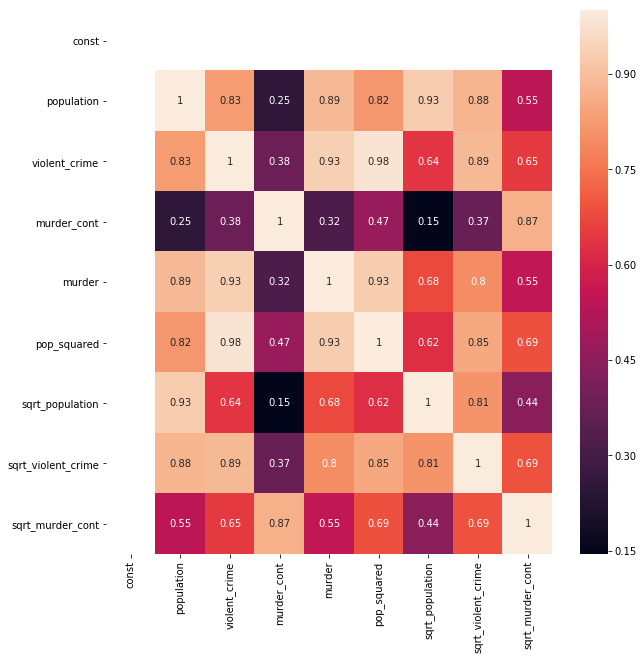

In [21]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
X = newyork[['population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont']]
Y = newyork['property_crime']
reg_model.fit(X,Y)

from sklearn import metrics
print("\nworking on all data\n")
print("cofficients: ", reg_model.coef_)
print("r2 whole data :", reg_model.score(X,Y))
print("rmse whole data :", np.sqrt(metrics.mean_squared_error(reg_model.predict(X), Y)))

print("\nmanual calcualtion of rsquared\n")
# manual calculation of Rsquared the whole data
# from sckit-learn documentation
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
# and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
Yhat = reg_model.predict(X)
SSE = np.sum((Y - Yhat) ** 2)
SST = np.sum((Y - Y.mean()) ** 2)
SSR = np.sum((Yhat - Y.mean()) ** 2)

print("SSE: ", SSE)
print("SST: ", SST)
print("SSR: ", SSR)

print("rsquared = ",(SSR/SST))
print("rsquared = ",1 - (SSE/SST))
print()


# evaluate
# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
reg_modelA = LinearRegression()
reg_modelA.fit(X_train, y_train)

# Predict
y_pred_train = reg_modelA.predict(X_train)
y_pred_test = reg_modelA.predict(X_test)

print("\nsklearn RMSE comparision\n")


# RMSE comparision training error, testing error
print("training error(RMSE): ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("testing error(RMSE) ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
# manual calculation of RMSE for training data
rmse = np.sqrt(np.sum((y_train - y_pred_train) ** 2)/(y_train.shape[0]))
print("RMSE(by hand)", rmse)

print("\nsklearn R2 comparision\n")

from sklearn.metrics import r2_score
print("rsquared on train data(80%)", reg_modelA.score(X_train, y_train))
print("rsquared on test data(20%)", reg_modelA.score(X_test, y_test))

# stats model helps to find tvalues
# check the pvalues of the parameters
# using stats models
print("\nstats model summary \n")

import statsmodels.formula.api as smf
import statsmodels.api as sm
X = sm.add_constant(X)
reg_modelB = smf.OLS(Y,X.astype(float)).fit()

print(reg_modelB.summary())
print("\n pvalues \n")

print(reg_modelB.pvalues)

print("\ncorrelation among features\n")
fig= plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

* rsquared is out of range. 
* test error(RMSE) higher than training error(RMSE). How high should our RMSE be? For example for Classification there is baseline for random, majority class, state of the art...

* the whole model pvalue (prob of fstatistic) is well below 0.05
* all features pvalue is also below 0.05
* why is the condtion number very large?
* I can see collinearity, does that affect R2 value?

#### Model C, D

population','pop_squared','murder','robbery


working on all data

cofficients:  [ 1.10512161e-05  2.53304287e-03 -6.15051080e-11  5.08498471e-02]
r2 whole data : 0.32956679198666927
rmse whole data : 0.2847948614606228

manual calcualtion of rsquared

SSE:  28.22562336380261
SST:  42.10057471264368
SSR:  13.874951347889919
rsquared =  0.32956679196407695
rsquared =  0.32956679198666927


sklearn RMSE comparision

training error(RMSE):  0.29094417545759244
testing error(RMSE)  0.2644967927246838
RMSE(by hand) 0.29094417545759244

sklearn R2 comparision

rsquared on train data(80%) 0.3399943808841952
rsquared on test data(20%) 0.2226827404261741

stats model summary 

                            OLS Regression Results                            
Dep. Variable:         property_crime   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 19 Nov 2018   Prob (F-stati

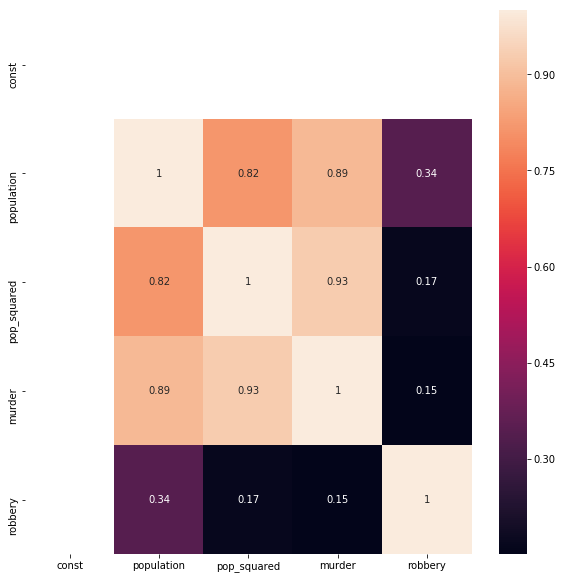

In [22]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
X = newyork[['population','pop_squared','murder','robbery']]
Y = newyork['property_crime']
reg_model.fit(X,Y)

print("\nworking on all data\n")
print("cofficients: ", reg_model.coef_)
print("r2 whole data :", reg_model.score(X,Y))
from sklearn import metrics
print("rmse whole data :", np.sqrt(metrics.mean_squared_error(reg_model.predict(X), Y)))

print("\nmanual calcualtion of rsquared\n")
# manual calculation of Rsquared the whole data
# from sckit-learn documentation
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
# and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
Yhat = reg_model.predict(X)
SSE = np.sum((Y - Yhat) ** 2)
SST = np.sum((Y - Y.mean()) ** 2)
SSR = np.sum((Yhat - Y.mean()) ** 2)

print("SSE: ", SSE)
print("SST: ", SST)
print("SSR: ", SSR)

print("rsquared = ",(SSR/SST))
print("rsquared = ",1 - (SSE/SST))
print()


# evaluate
# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
reg_modelC = LinearRegression()
reg_modelC.fit(X_train, y_train)

# Predict
y_pred_train = reg_modelC.predict(X_train)
y_pred_test = reg_modelC.predict(X_test)

print("\nsklearn RMSE comparision\n")


# RMSE comparision training error, testing error
print("training error(RMSE): ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("testing error(RMSE) ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
# manual calculation of RMSE for training data
rmse = np.sqrt(np.sum((y_train - y_pred_train) ** 2)/(y_train.shape[0]))
print("RMSE(by hand)", rmse)

print("\nsklearn R2 comparision\n")

from sklearn.metrics import r2_score
print("rsquared on train data(80%)", reg_modelC.score(X_train, y_train))
print("rsquared on test data(20%)", reg_modelC.score(X_test, y_test))

# stats model helps to find tvalues
# check the pvalues of the parameters
# using stats models
print("\nstats model summary \n")

import statsmodels.formula.api as smf
import statsmodels.api as sm
X = sm.add_constant(X)
reg_modelD = smf.OLS(Y,X.astype(float)).fit()

print(reg_modelD.summary())
print("\n pvalues \n")

print(reg_modelD.pvalues)

print("\ncorrelation among features\n")
fig= plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

* r2 on test data is smaller than on train data. Is 0.2 or 0.3 a good Rsquared value?
* test error(RMSE) is a little less than training error(RMSE). 
* the whole model pvalue (prob of fstatistic) is well below 0.05
* all features pvalue is below 0.05 except robbery
* why is the condtion number very large?
* I can see collinearity, does that affect R2 value?

watch the video below to understand each meteric, like standard error, confidence interval for each feature

https://www.youtube.com/watch?v=ZkjP5RJLQF4&list=PLIeGtxpvyG-LoKUpV0fSY8BGKIMIdmfCi&ab_channel=BrandonFoltz
    
The null hypothesis for F-statistic is a feature is not relevant for the model so it is zero. 

Fcritical can be obtained from F distribution table(with a given degrees of freedom) and if its probability is less than 0.05, we reject the null hypothesis and that feature is relevant

Fstatistic is calculated for the whole model and for individual features. See the previous tutorial on the curriculum.

Use these two resources as alternative tutorials

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

https://www.youtube.com/watch?v=VvlqA-iO2HA&ab_channel=zedstatistics

#### Model E: using cross validation, with mean squared error

In [23]:
# cross validation, mean squared error
X = newyork[['population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont']]
Y = newyork['property_crime']
reg_modelE = LinearRegression()
reg_modelE.fit(X, Y)
Ypred = reg_modelE.predict(X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y)))
from sklearn.model_selection import cross_val_score
# cross_val_score returns the negative of the error to make large errors small
print("CV-score(RMSE): ", -np.mean(cross_val_score(reg_modelE, X, Y, cv=10, scoring='neg_mean_squared_error')))

RMSE:  0.10946731501390083
CV-score(RMSE):  0.41727956151391066


#### Model F: using cross validation with mean squared error

In [24]:
# cross validation, mean squared error
X = newyork[['population','pop_squared','murder','robbery']]
Y = newyork['property_crime']
reg_modelF = LinearRegression()
reg_modelF.fit(X, Y)
Ypred = reg_modelF.predict(X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y)))
from sklearn.model_selection import cross_val_score
print("CV-score(RMSE): ", -np.mean(cross_val_score(reg_modelF, X, Y, cv=10, scoring='neg_mean_squared_error')))

RMSE:  0.2847948614606228
CV-score(RMSE):  0.08950172903183355


#### Model G: using cross validation with r^2 

In [25]:
# cross validation, r2
X = newyork[['population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont']]
Y = newyork['property_crime']
reg_modelG = LinearRegression()
reg_modelG.fit(X, Y)
Ypred = reg_modelG.predict(X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y)))
from sklearn.model_selection import cross_val_score
print("CV-score(r2): ", np.mean(cross_val_score(reg_modelG, X, Y, cv=10, scoring='r2')))

RMSE:  0.10946731501390083
CV-score(r2):  -3.2615216467087342


#### Model H: using cross validation with r^2 

In [26]:
# cross validation, r2
X = newyork[['population','pop_squared','murder','robbery']]
Y = newyork['property_crime']
reg_modelH = LinearRegression()
reg_modelH.fit(X, Y)
Ypred = reg_modelH.predict(X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y)))
from sklearn.model_selection import cross_val_score
print("CV-score(r2): ", np.mean(cross_val_score(reg_modelH, X, Y, cv=10, scoring='r2')))

RMSE:  0.2847948614606228
CV-score(r2):  0.10469508985953406


https://stackoverflow.com/questions/24132237/scikit-learn-cross-validation-scoring-for-regression

https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/

#### Testing on Texas Crime Data

In [27]:
texas = pd.read_csv("../../../Data & Script/texas_offence.csv", skiprows=4, thousands=",")
print(len(texas))
# drop unused columns
texas = texas.drop(texas.columns[4], axis=1)
texas = texas.drop(texas.columns[-1], axis=1)

# drop a cell which contains atleast one missing values, 
texas = texas.dropna().reset_index(drop=True)
# replace outliers in all collumns with the next highest number
for col in texas.columns[1:]:
    # print which rows are replaced
    replaced_numbers = replace_outliers_with_mean(texas, col,1)
    print(replaced_numbers)

607
{145, 117, 438, 21, 222}
{438, 117, 222}
{438, 117, 222}
{145, 117, 438, 21, 222}
{438, 117, 222}
{145, 117, 438, 21, 222}
{117, 438, 21, 222}
{117, 438, 21, 222}
{117, 438, 21, 222}
{438, 117, 222}
{438, 117, 222}


In [28]:
texas['PopSquared'] = texas['Population'] ** 2
texas['Murder'] = texas[texas.columns[3]] > 0
texas['Robbery'] = texas['Robbery'] > 0
new_column_names = ['city', 'population', 'violent_crime', 'murder_cont', 'rape2', 'robbery',
                   'aggravated_assault', 'property_crime', 'burglary', 
                   'lacrceny_theft', 'motor_vehicle_theft', 'arson3','pop_squared', 'murder']
texas.columns = new_column_names
# rearrange the columns
texas.columns = new_column_names[:7] + new_column_names[8:] + [new_column_names[7]]

In [29]:
# create sqrt features
good_features = ['population', 'violent_crime','murder_cont','robbery', 'pop_squared',]
sqrt_features = ['sqrt_'+ c for c in good_features[:-1]]

# sqrt is not applied to pop_squared because it will create duplicate feature, population
for col in good_features[:-1]:
    texas['sqrt_' + col] = texas[col] ** (1/2)

In [30]:
# rsquared on modelA
X_test = texas[['population', 'violent_crime', 'murder_cont', 'murder', 'pop_squared', 'sqrt_population', 'sqrt_violent_crime', 'sqrt_murder_cont']]
Y_test = texas['property_crime']
print("rsquared on texas data", reg_modelA.score(X_test, Y_test))
Ypred = reg_modelA.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y_test)))

rsquared on texas data -16.609008911876213
RMSE:  1.775311110269111


In [31]:
# rsquared on modelC
X_test = texas[['population','pop_squared','murder','robbery']]
Y_test = texas['property_crime']
print("rsquared on texas data", reg_modelC.score(X_test, Y_test))
Ypred = reg_modelC.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Ypred, Y_test)))

rsquared on texas data -0.40438268654589615
RMSE:  0.5013600762576605


#### Questions

Why R2 gets out of range?

How much is a good RMSE? Are my models good? Accuracy ranges from 0 to 1, What is the boundary for RMSE?

How much is a good R2?

What is wrong with murder_cont?

Why I get a warning from statsmodels about condition? What is condition in linear regression?

It is very hard remove multicolinearity, so what are my options?

Do people use R2 to evaluate models? I never heard of it when I was doing Regression last year, I relyed on RMSE

What is advanage of doing sqrt, log and creating new features?